In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import time

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\irola\Desktop\Dataset2\dataset-7ms.csv")

In [3]:
#Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols] # Features
y = data['Behavior'] # Target variable

In [ ]:
# Assuming 'X' is your feature matrix and 'y' is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to build the Keras-based base model
def build_base_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator using KerasClassifier
base_model = KerasClassifier(build_fn=build_base_model, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)

# Create base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('keras', base_model)  # Use the wrapped Keras model
]

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Measure the start time
start_time = time.time()

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print elapsed time
print("Elapsed Time:", elapsed_time, "seconds")

C:\Users\irola\AppData\Local\Temp\ipykernel_8432\4190750989.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_model = KerasClassifier(build_fn=build_base_model, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)


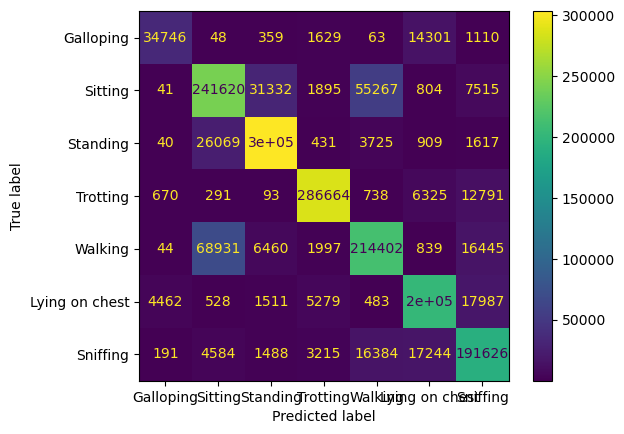

              precision    recall  f1-score   support

   Galloping       0.86      0.66      0.75     52256
 Lying chest       0.71      0.71      0.71    338474
     Sitting       0.88      0.90      0.89    336313
    Sniffing       0.95      0.93      0.94    307572
    Standing       0.74      0.69      0.71    309118
    Trotting       0.83      0.87      0.85    232259
     Walking       0.77      0.82      0.79    234732

    accuracy                           0.81   1810724
   macro avg       0.82      0.80      0.81   1810724
weighted avg       0.81      0.81      0.81   1810724



In [5]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))